In [34]:
import sys
sys.path.append("../../src")
import os
import datetime
import pandas as pd
import numpy as np
from sindy_utils import library_size
import tensorflow as tf
from training import train_network
from preprocess_utils import split_data, build_network_layers
import pickle

In [5]:
#Innitialize the parameter dictionary
params = {}

In [21]:
#Parameters used for defining the preprocessing over the dataset
params['data_path'] = os.getcwd() + '/'
params['window_size']=4#The window length of averaging
params['stride']=2

In [32]:
path="gene_names.pkl"
with open(path, 'rb') as pkl_file:
    name_genes = pickle.load(pkl_file)
path="time_series.pkl"
with open(path, 'rb') as pkl_file:
    training_dict = pickle.load(pkl_file)
path="preprocess_params.pkl"
with open(path, 'rb') as pkl_file:
    preprocess_params = pickle.load(pkl_file)

In [33]:
for key, val in preprocess_params.items():
    params[key]=val

In [35]:
training_data, validation_data = split_data(training_dict, validation_ratio=0.1) #split the data into training and validation sets


In [36]:
print(training_data['x'].shape, training_data['dx'].shape, training_data['classes'].shape) #verify the shapes of the training data
print(validation_data['x'].shape, validation_data['dx'].shape,validation_data['classes'].shape) #verify the shapes of the validation data

(1292, 2001) (1292, 2000) (1292, 7)
(143, 2001) (143, 2000) (143, 7)


In [37]:
check=training_data['classes']
if not isinstance(check, pd.DataFrame):
    classes_df = pd.DataFrame(check)
else:
    classes_df = check

# Sum along the rows to get the count of each class
class_counts = classes_df.sum(axis=0)

# Convert the result to a dictionary for easy access
class_counts_dict = class_counts.to_dict()

print("Number of elements of each class:")
print(class_counts_dict)

Number of elements of each class:
{0: 91, 1: 129, 2: 505, 3: 17, 4: 290, 5: 21, 6: 239}


In [38]:
check=validation_data['classes']
if not isinstance(check, pd.DataFrame):
    classes_df = pd.DataFrame(check)
else:
    classes_df = check

# Sum along the rows to get the count of each class
class_counts = classes_df.sum(axis=0)

# Convert the result to a dictionary for easy access
class_counts_dict = class_counts.to_dict()

print("Number of elements of each class:")
print(class_counts_dict)


Number of elements of each class:
{0: 7, 1: 18, 2: 54, 3: 2, 4: 32, 5: 2, 6: 28}


EXPERIMENT 0


c:\Users\Vasu\anaconda3\envs\sindy\lib\site-packages\tensorflow\python\framework\tensor_util.py:501: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_proto.tensor_content = nparray.tostring()
c:\Users\Vasu\anaconda3\envs\sindy\lib\site-packages\tensorflow\python\framework\tensor_util.py:119: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  tensor_proto.float_val.extend([np.asscalar(x) for x in proto_values])
c:\Users\Vasu\anaconda3\envs\sindy\lib\site-packages\tensorflow\python\framework\tensor_util.py:125: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  tensor_proto.int_val.extend([np.asscalar(x) for x in proto_values])


TRAINING
Legend
['Combined loss', 'Reconstruction loss', 'SINDy_z loss', 'SINDy_x loss', 'Sindy Regularisation- L1 Norm', 'Autoencoder weights- L1 Norm', 'Classification Loss']
Epoch 0
Training loss 29.535236358642578, (0.2819165, 55.205982, 0.24832793, 0.99989825, 47559.008, 0.7091353)
Validation loss 29.672210693359375, (0.28304544, 58.199757, 0.2579363, 0.99989825, 47559.008, 0.7023174)
decoder loss ratio: 0.974228, decoder SINDy loss  ratio: 316.349483, SINDy z loss ratio: 85286.679688
REFINEMENT
Epoch 0
Training loss 43.54236602783203, (0.26166233, 1636.7921, 2.894069, 0.99981844, 47250.59, 0.67156017)
Validation loss 43.828941345214844, (0.26270533, 1654.055, 2.9917657, 0.99981844, 47250.59, 0.671435)
decoder loss ratio: 0.904218, decoder SINDy loss  ratio: 3669.291789, SINDy z loss ratio: 2423873.750000


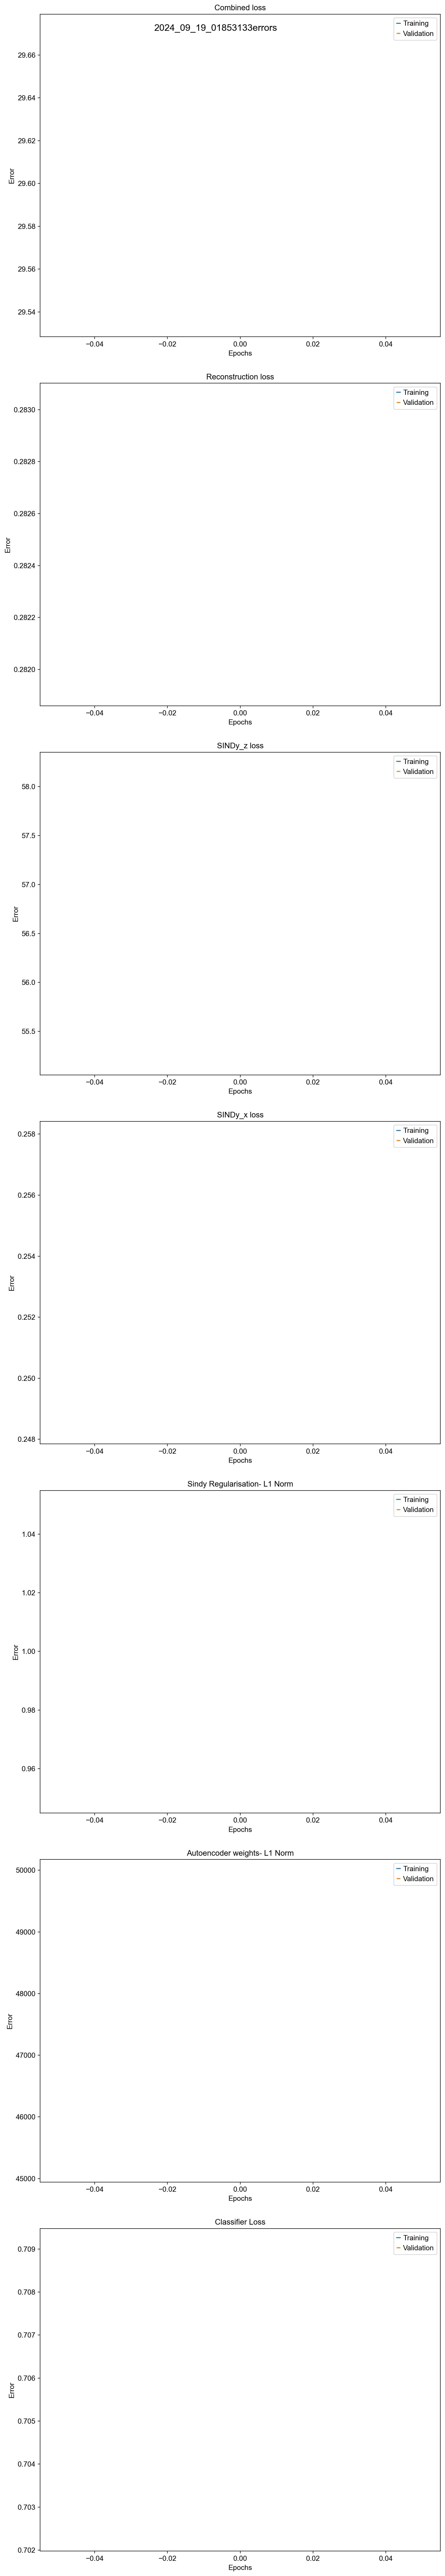

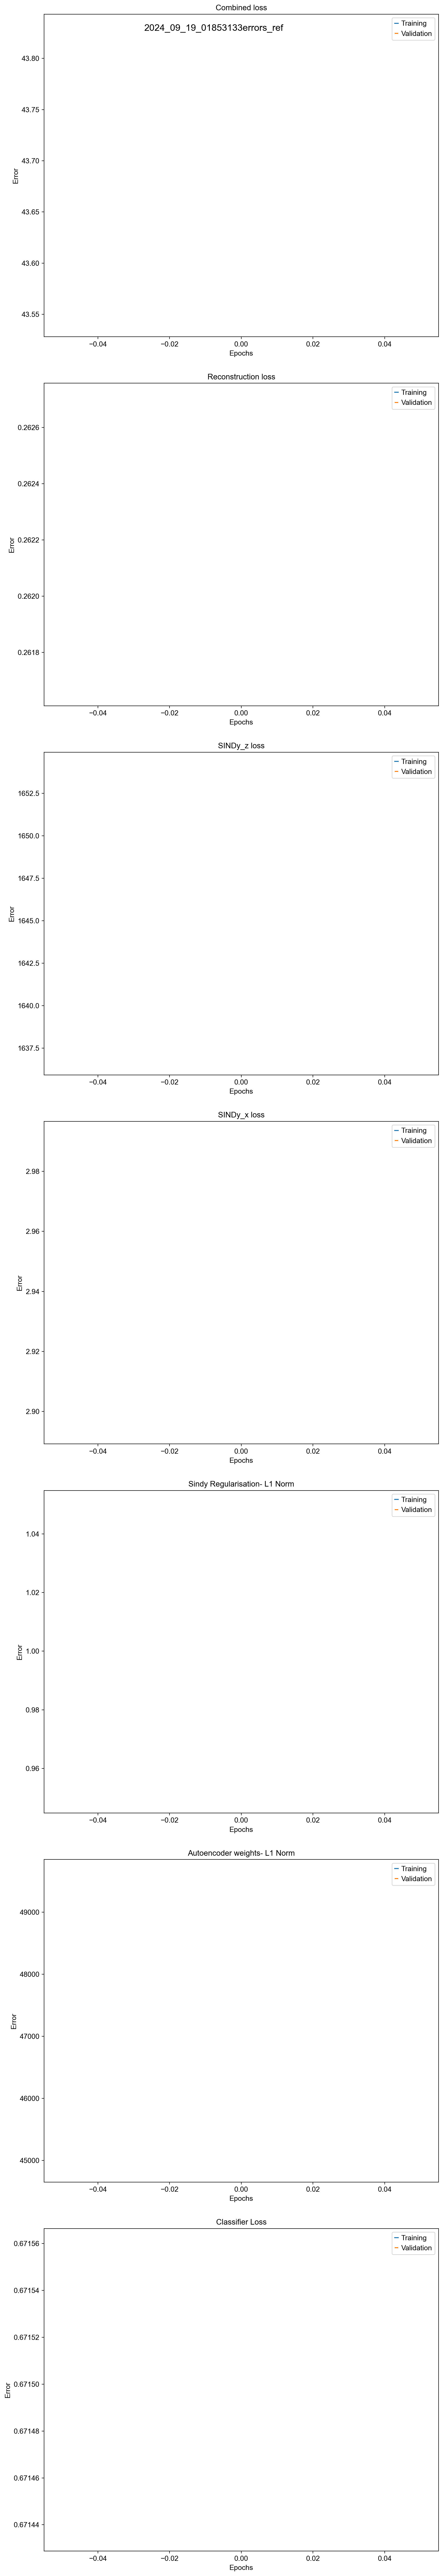

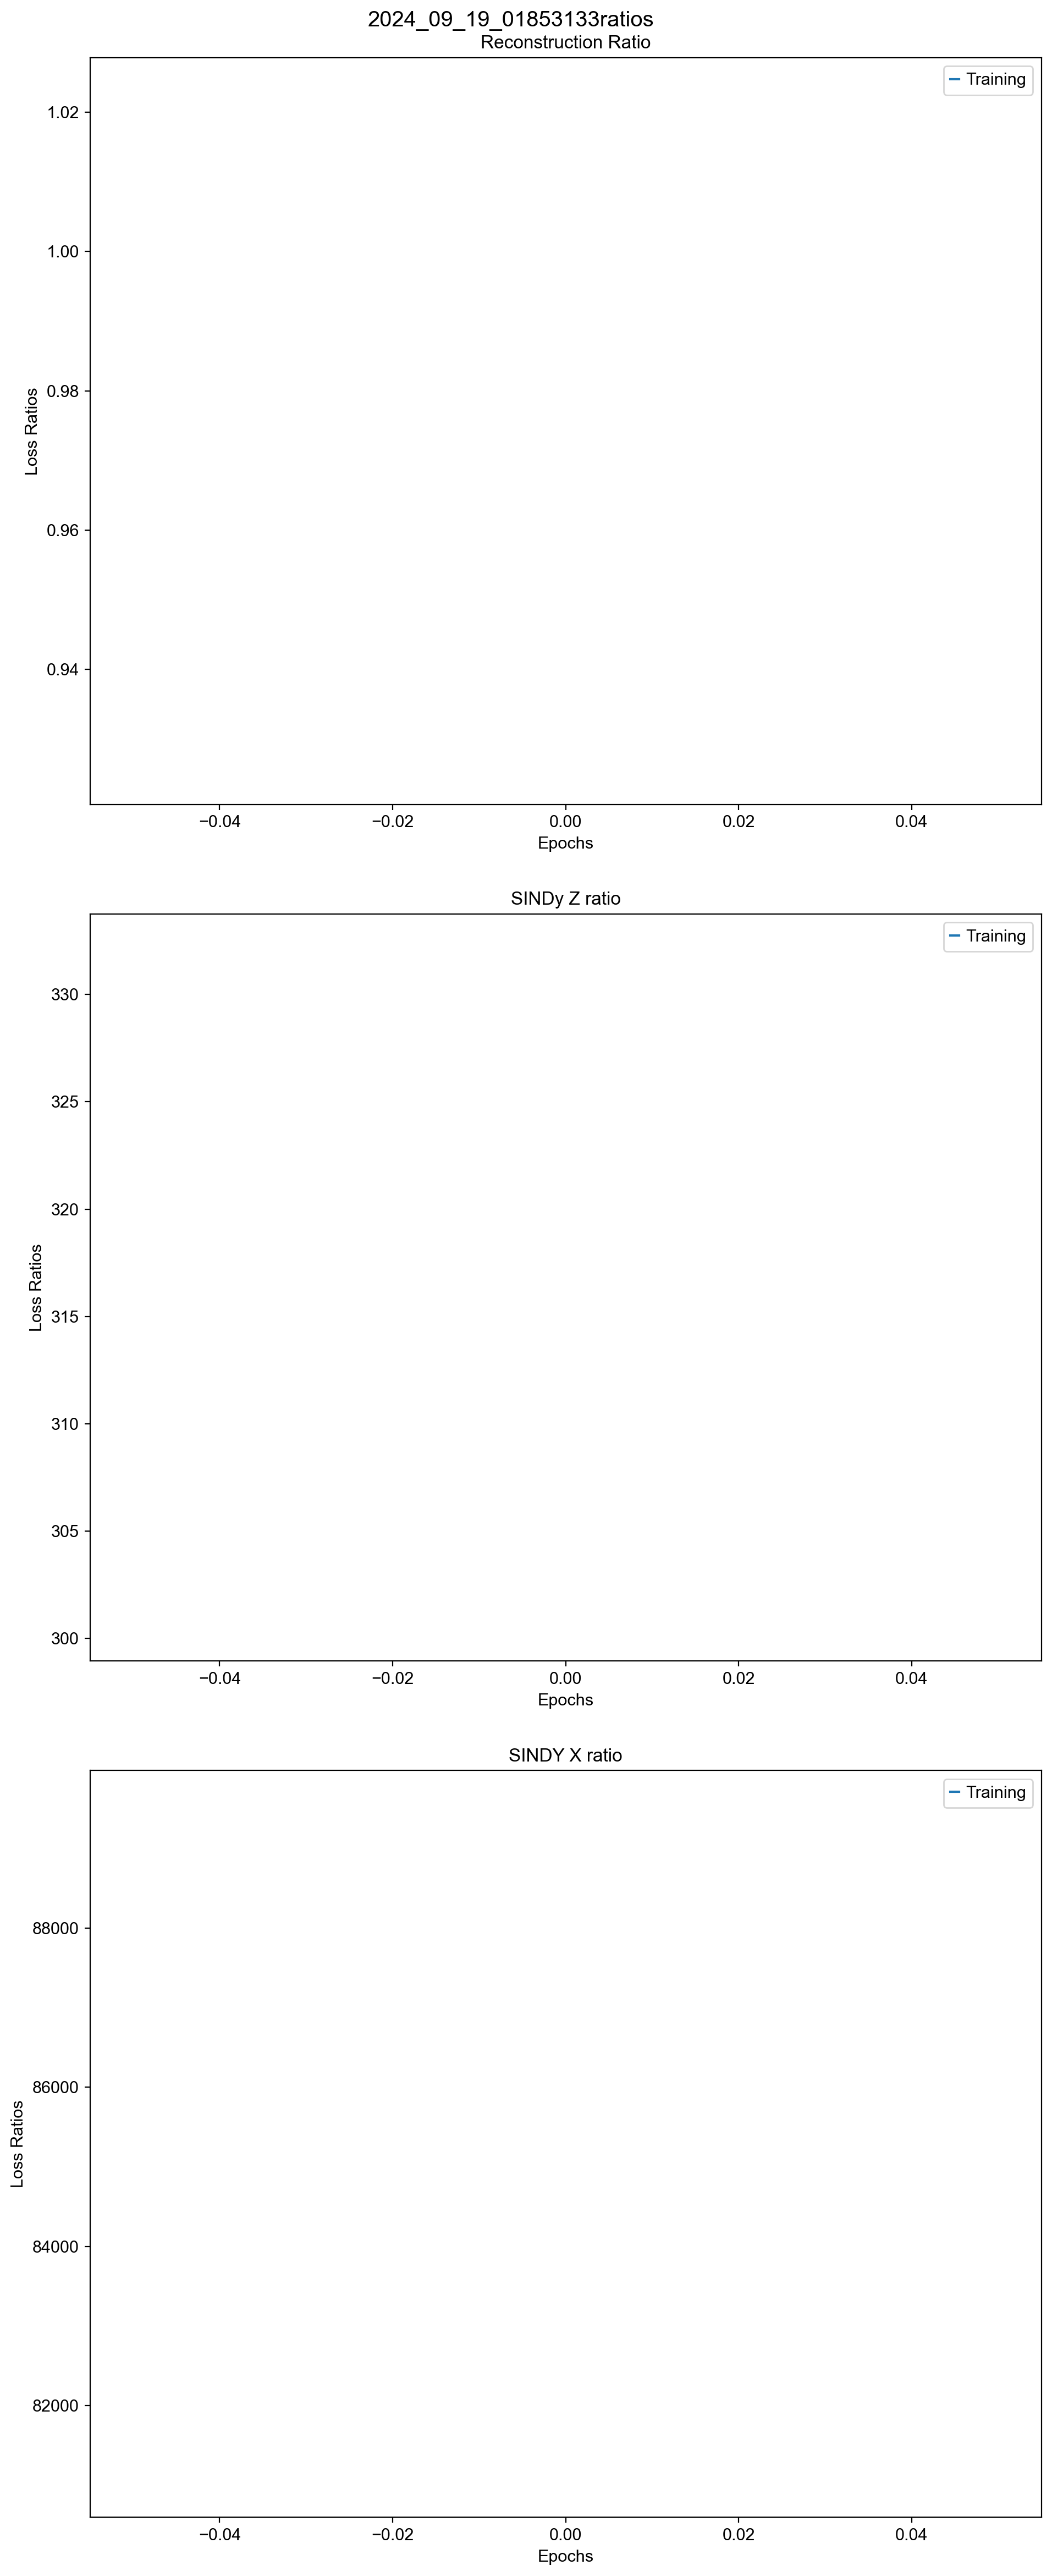

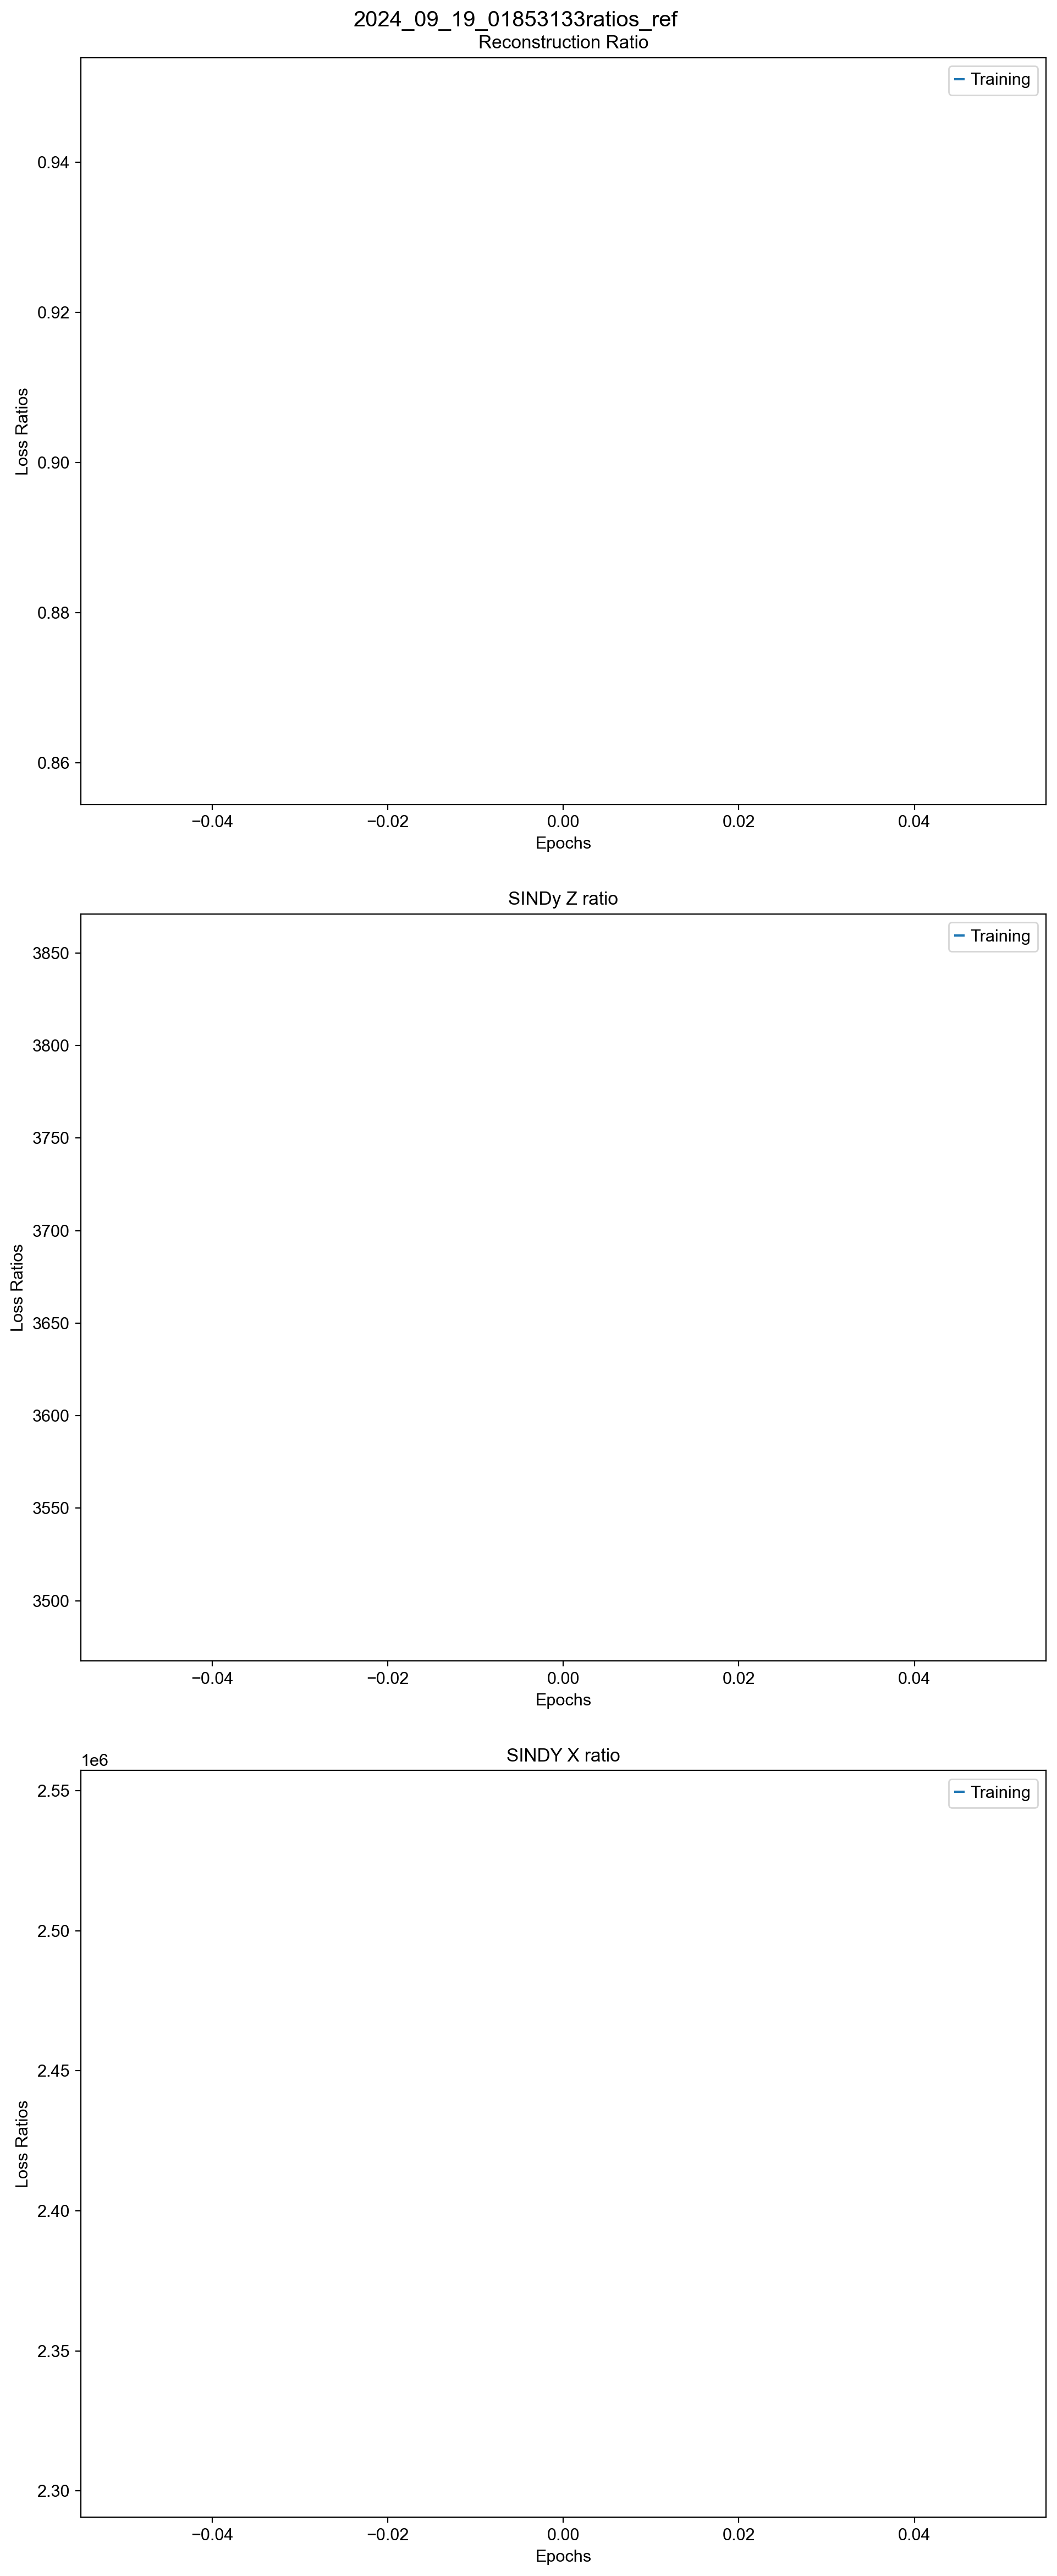

EXPERIMENT 1


c:\Users\Vasu\anaconda3\envs\sindy\lib\site-packages\tensorflow\python\framework\tensor_util.py:501: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_proto.tensor_content = nparray.tostring()
c:\Users\Vasu\anaconda3\envs\sindy\lib\site-packages\tensorflow\python\framework\tensor_util.py:119: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  tensor_proto.float_val.extend([np.asscalar(x) for x in proto_values])
c:\Users\Vasu\anaconda3\envs\sindy\lib\site-packages\tensorflow\python\framework\tensor_util.py:125: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  tensor_proto.int_val.extend([np.asscalar(x) for x in proto_values])


TRAINING
Legend
['Combined loss', 'Reconstruction loss', 'SINDy_z loss', 'SINDy_x loss', 'Sindy Regularisation- L1 Norm', 'Autoencoder weights- L1 Norm', 'Classification Loss']
Epoch 0
Training loss 33.082298278808594, (0.28215742, 404.1275, 1.4182065, 0.9999051, 47629.15, 0.6258321)
Validation loss 33.47927474975586, (0.28348818, 428.32434, 1.5040879, 0.9999051, 47629.15, 0.6391736)
decoder loss ratio: 0.975752, decoder SINDy loss  ratio: 1844.709097, SINDy z loss ratio: 475231.468750
REFINEMENT
Epoch 0
Training loss 28.871232986450195, (0.27326122, 70.38626, 0.30273378, 0.9998469, 47151.1, 0.7638233)
Validation loss 28.998634338378906, (0.274323, 71.69476, 0.3075134, 0.9998469, 47151.1, 0.7714844)
decoder loss ratio: 0.944206, decoder SINDy loss  ratio: 377.153976, SINDy z loss ratio: 79546.281250


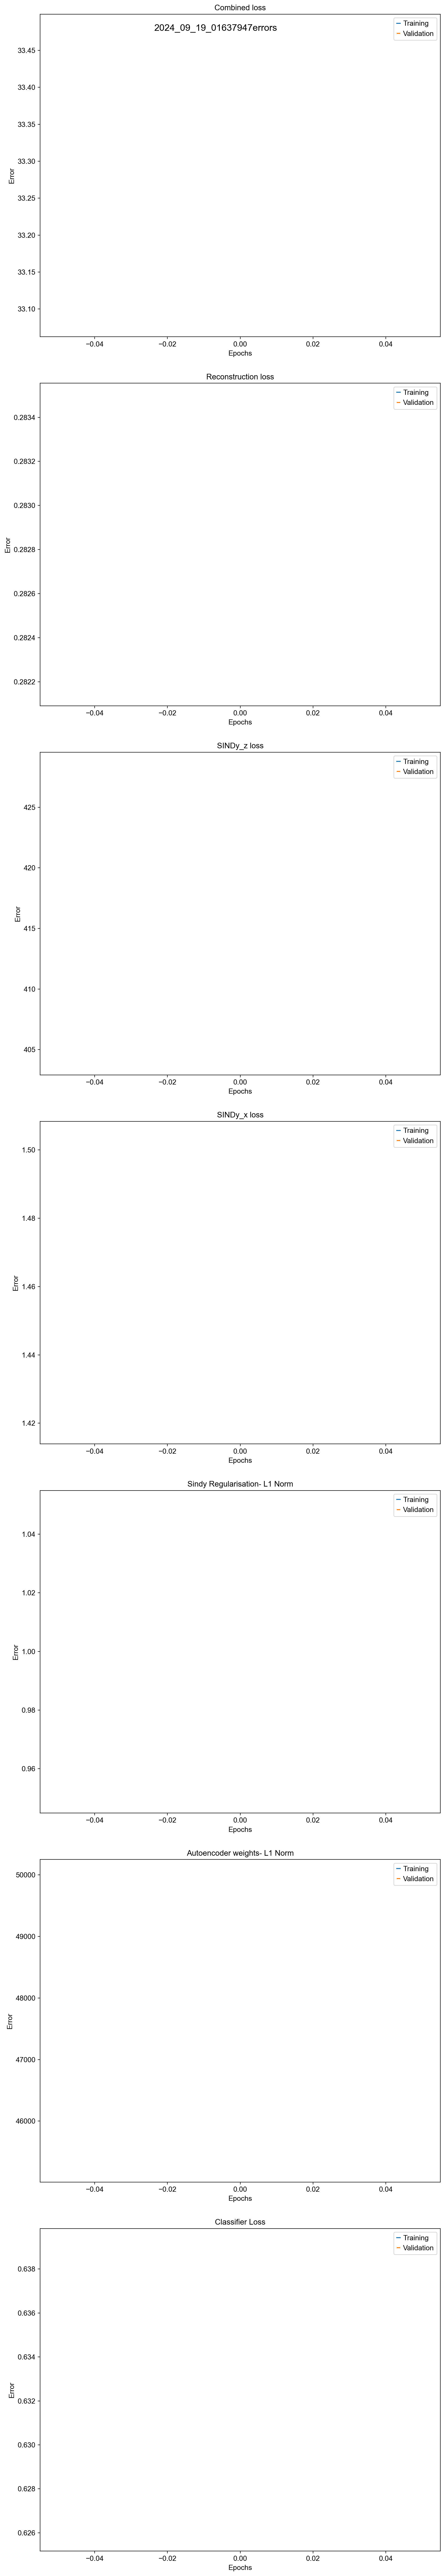

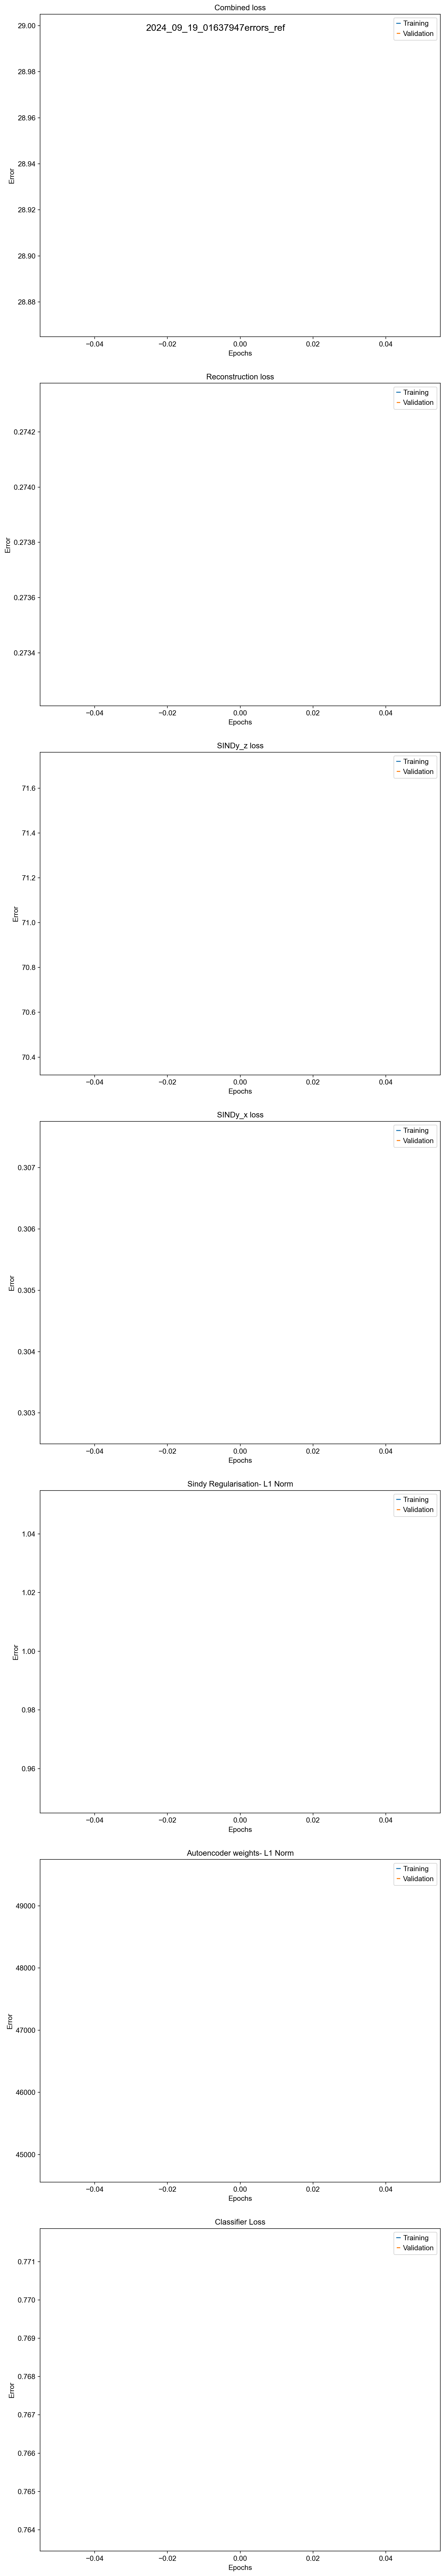

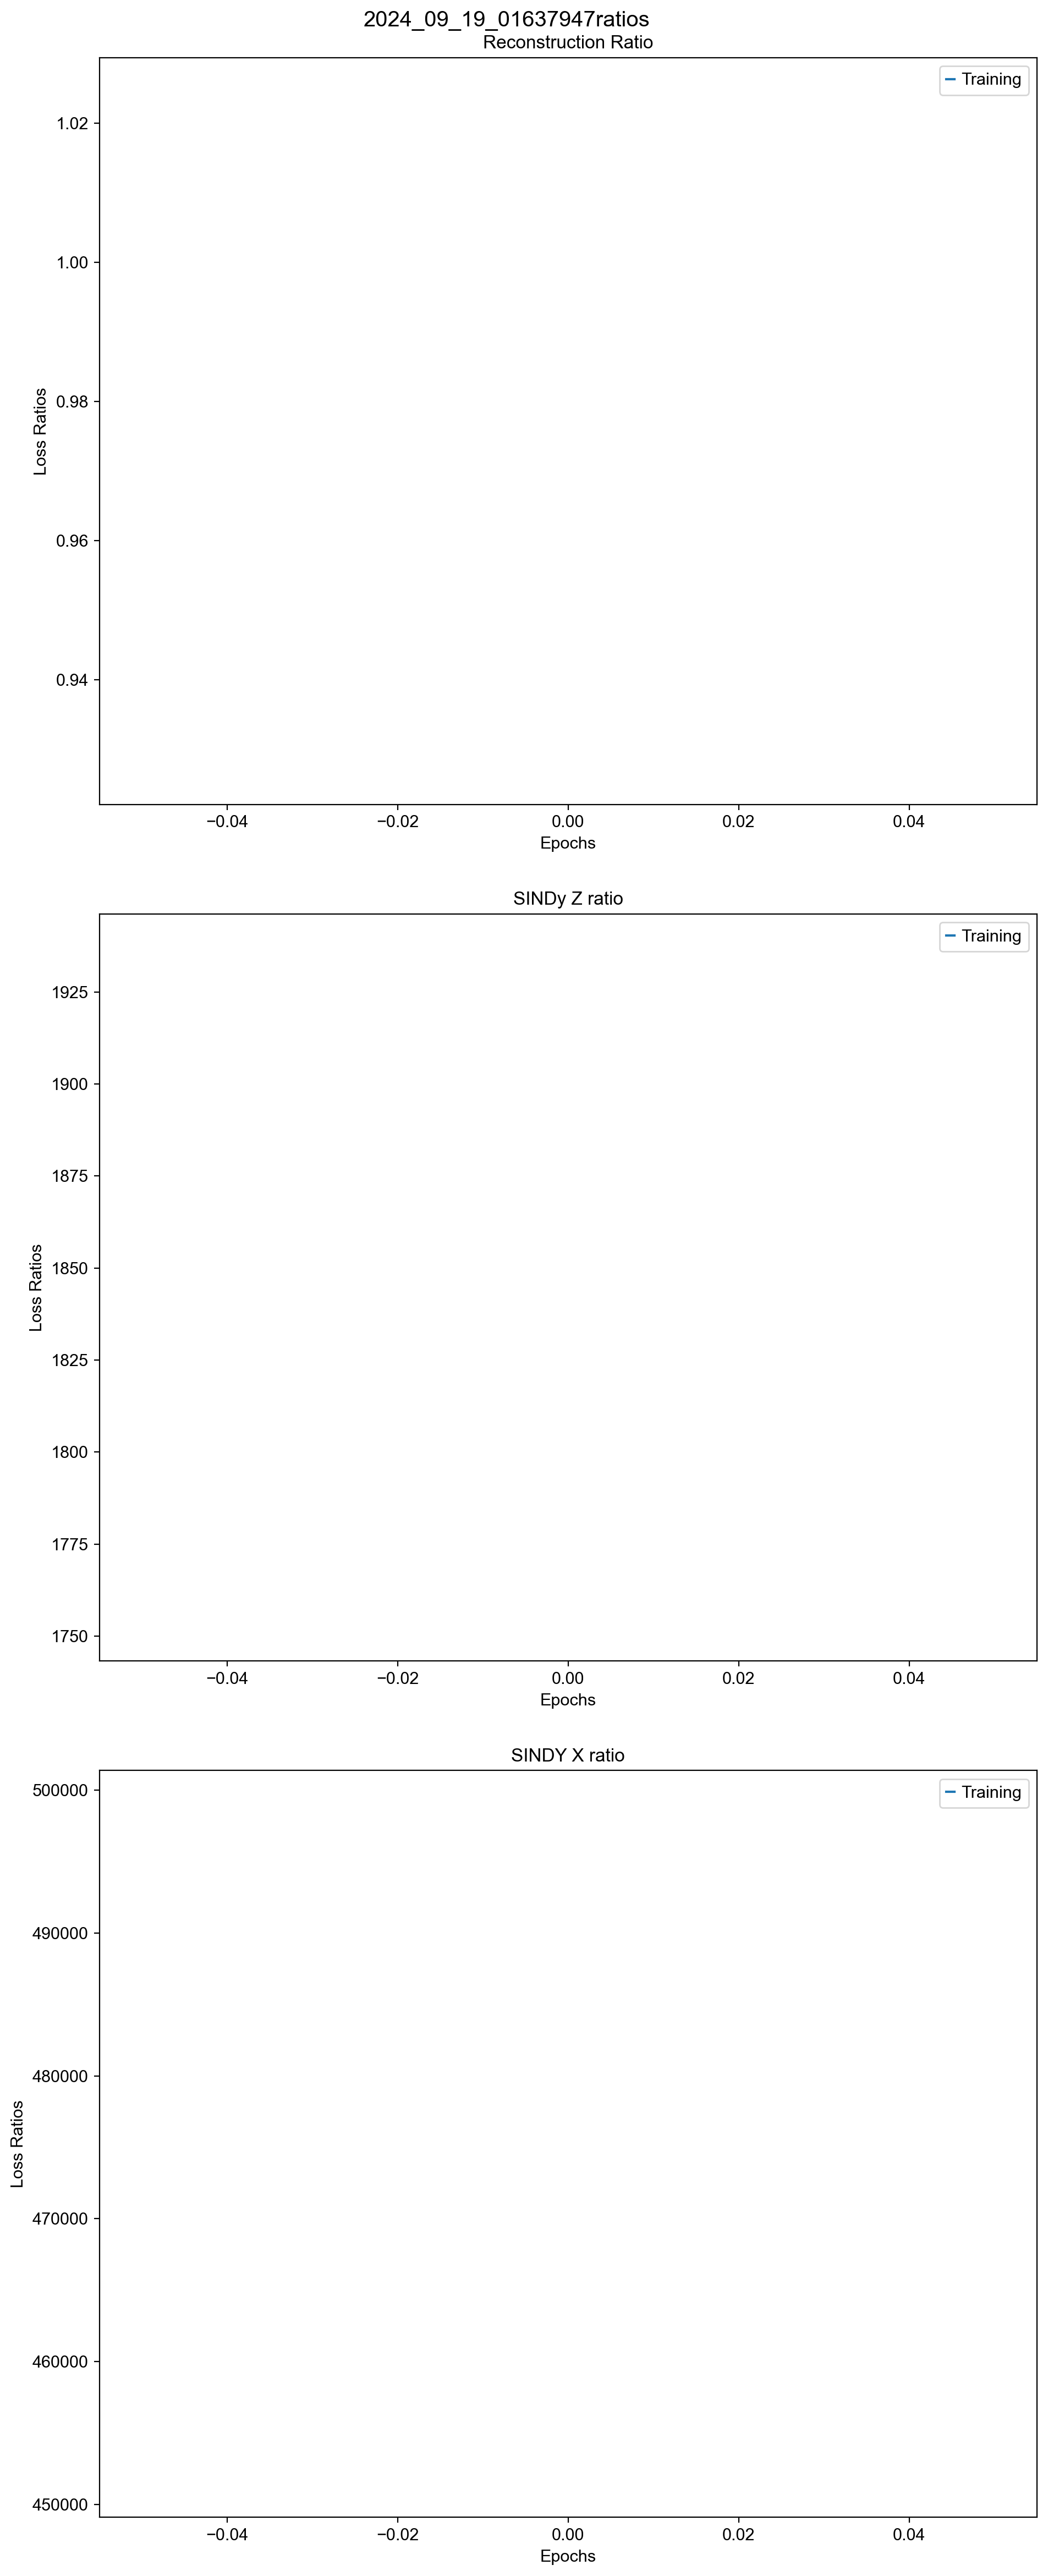

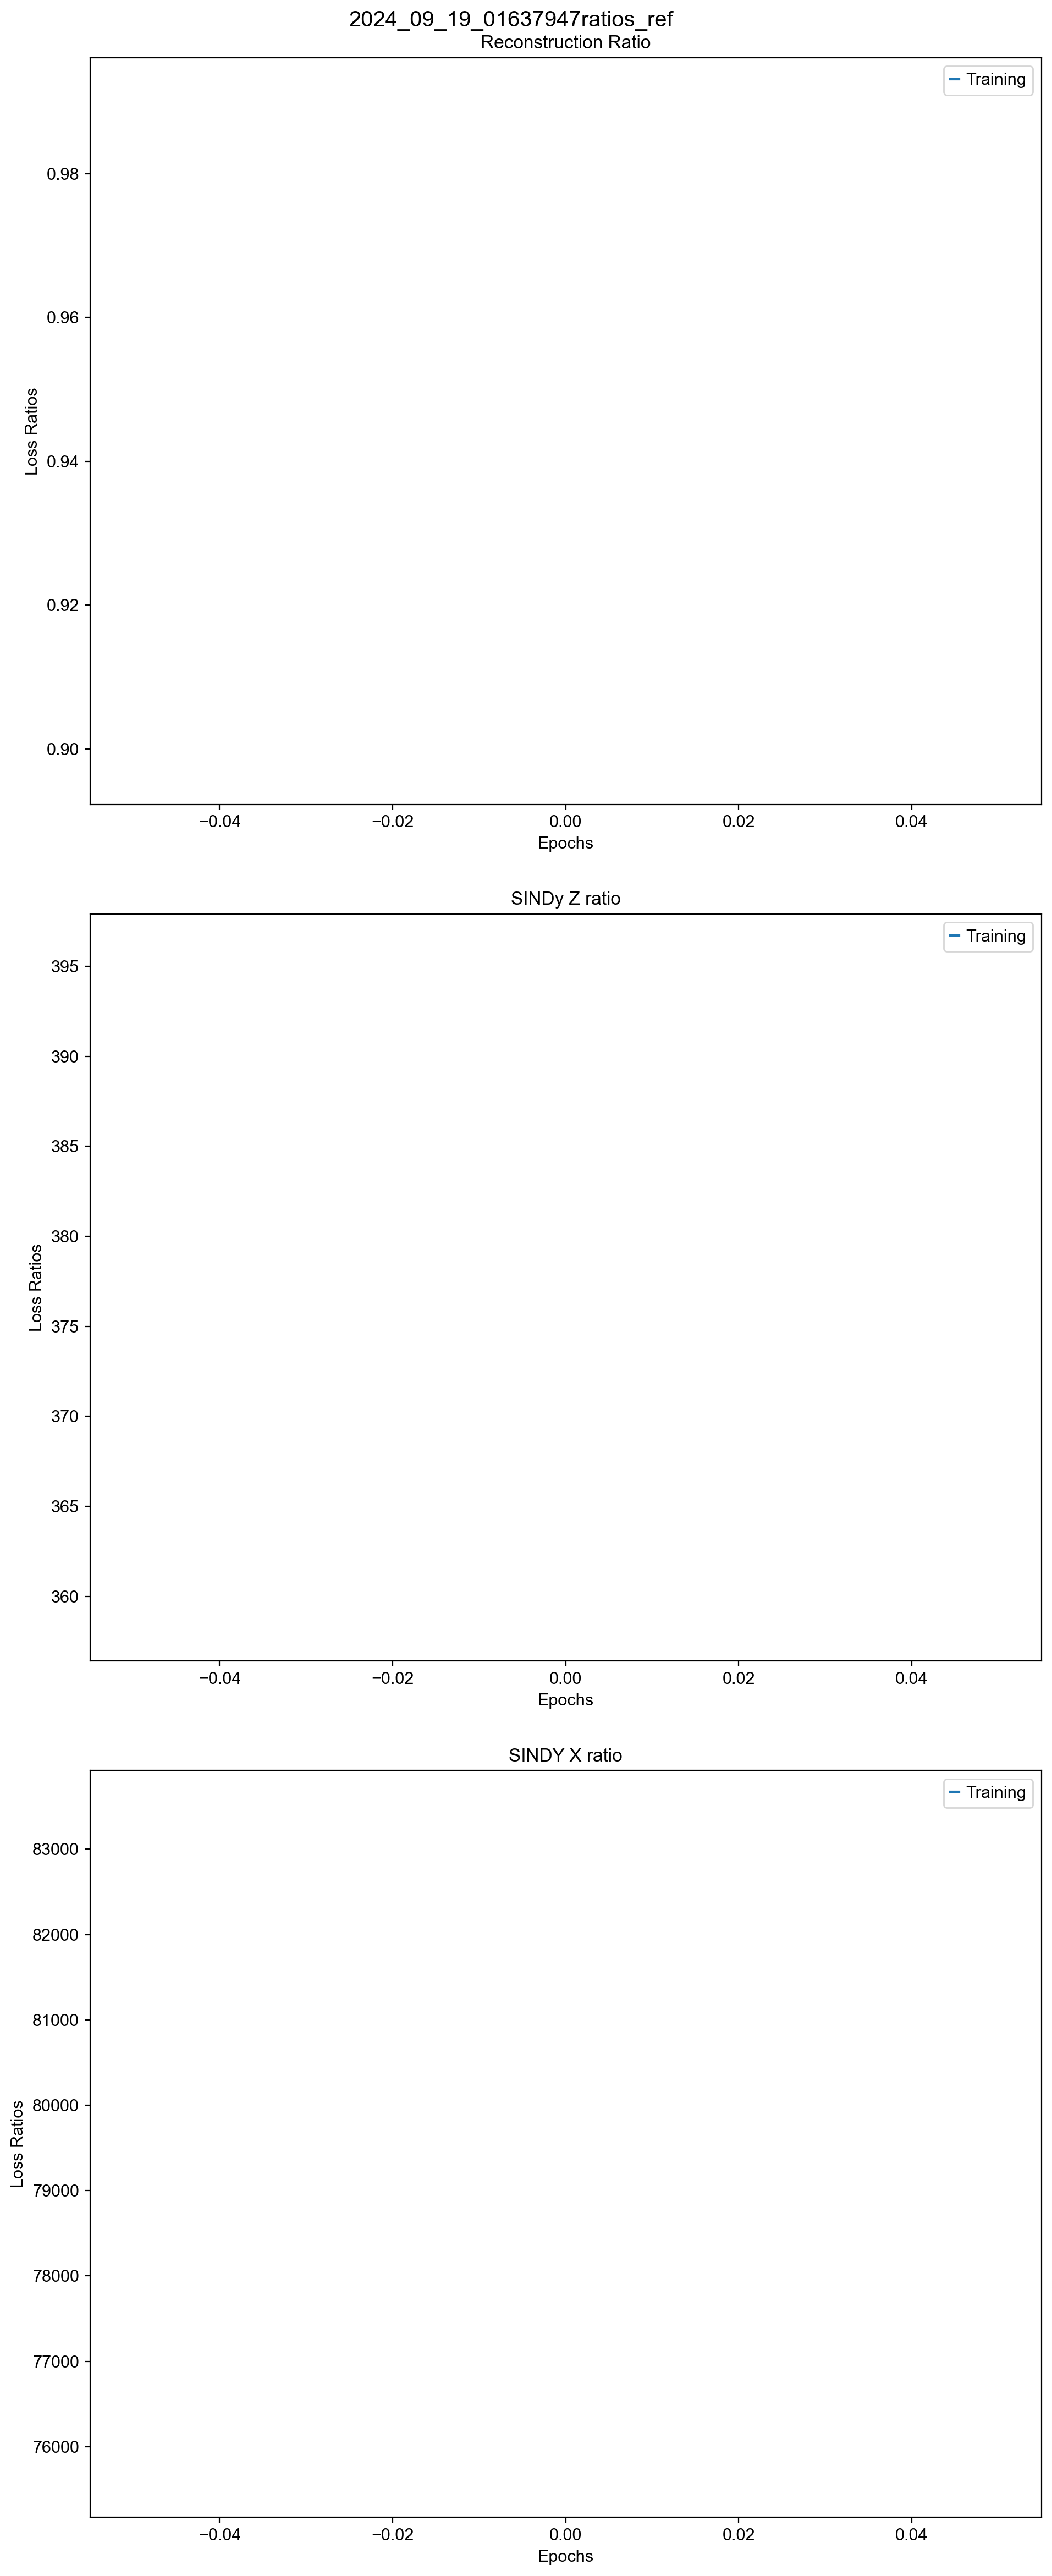

EXPERIMENT 2


c:\Users\Vasu\anaconda3\envs\sindy\lib\site-packages\tensorflow\python\framework\tensor_util.py:501: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_proto.tensor_content = nparray.tostring()
c:\Users\Vasu\anaconda3\envs\sindy\lib\site-packages\tensorflow\python\framework\tensor_util.py:119: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  tensor_proto.float_val.extend([np.asscalar(x) for x in proto_values])
c:\Users\Vasu\anaconda3\envs\sindy\lib\site-packages\tensorflow\python\framework\tensor_util.py:125: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  tensor_proto.int_val.extend([np.asscalar(x) for x in proto_values])


TRAINING
Legend
['Combined loss', 'Reconstruction loss', 'SINDy_z loss', 'SINDy_x loss', 'Sindy Regularisation- L1 Norm', 'Autoencoder weights- L1 Norm', 'Classification Loss']
Epoch 0
Training loss 35.84145736694336, (0.28512225, 645.31775, 2.0830998, 0.99996376, 47515.81, 0.6102346)
Validation loss 35.90525817871094, (0.28620404, 640.5314, 2.0636966, 0.99996376, 47515.81, 0.6156528)
decoder loss ratio: 0.985100, decoder SINDy loss  ratio: 2531.048798, SINDy z loss ratio: 828624.562500
REFINEMENT
Epoch 0
Training loss 28.87374496459961, (0.27705136, 33.918766, 0.17960463, 0.9998695, 47078.645, 0.764383)
Validation loss 29.00194549560547, (0.27831605, 33.80019, 0.17815003, 0.9998695, 47078.645, 0.76744527)
decoder loss ratio: 0.957950, decoder SINDy loss  ratio: 218.494525, SINDy z loss ratio: 43725.675781


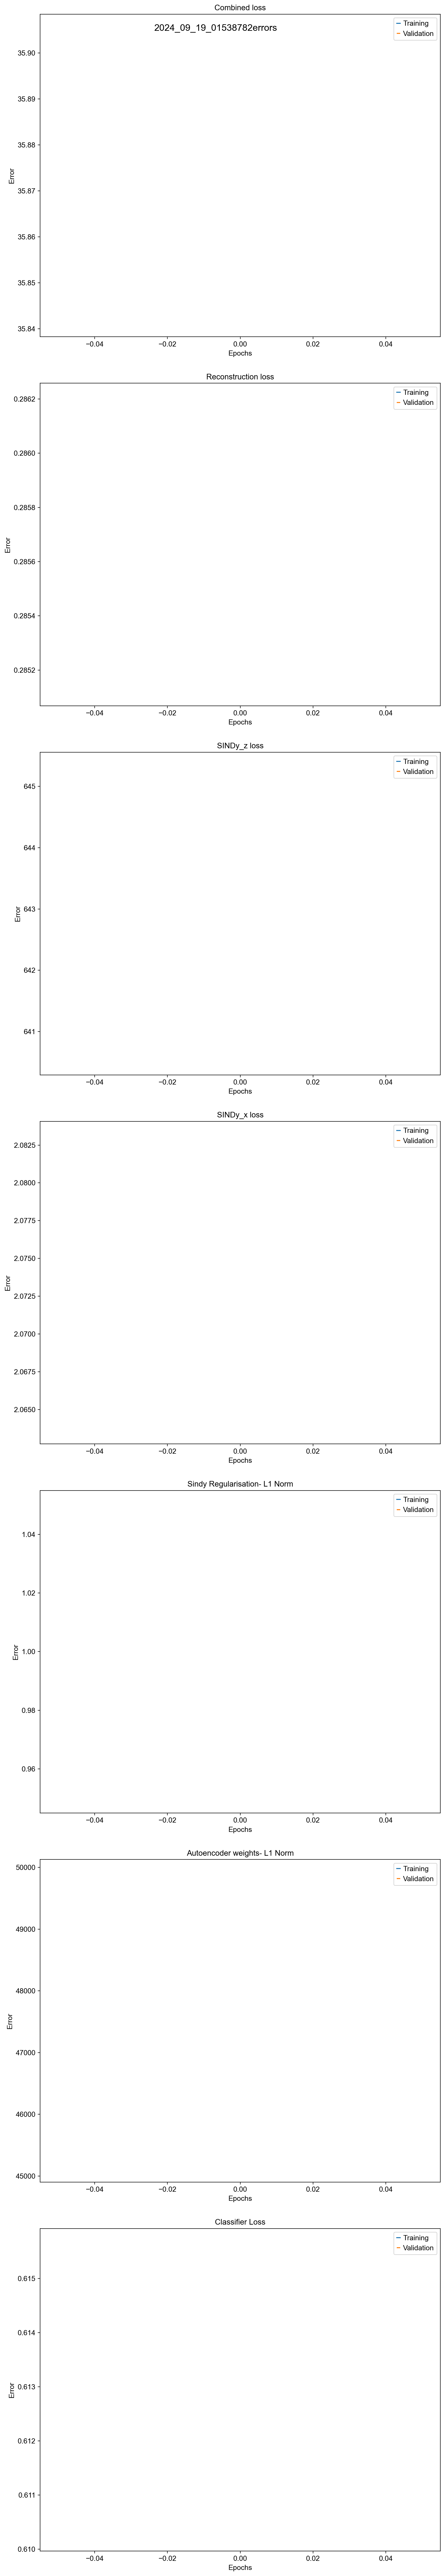

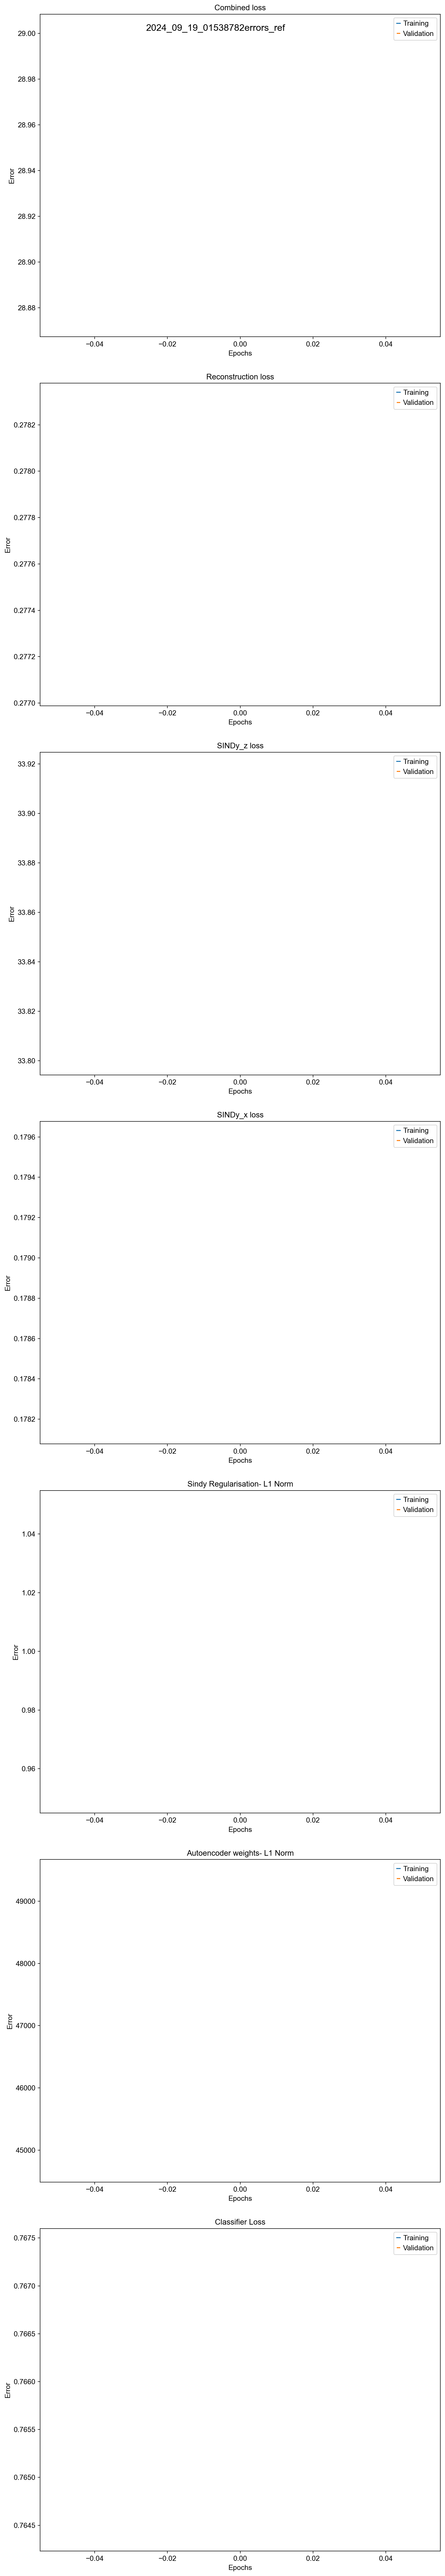

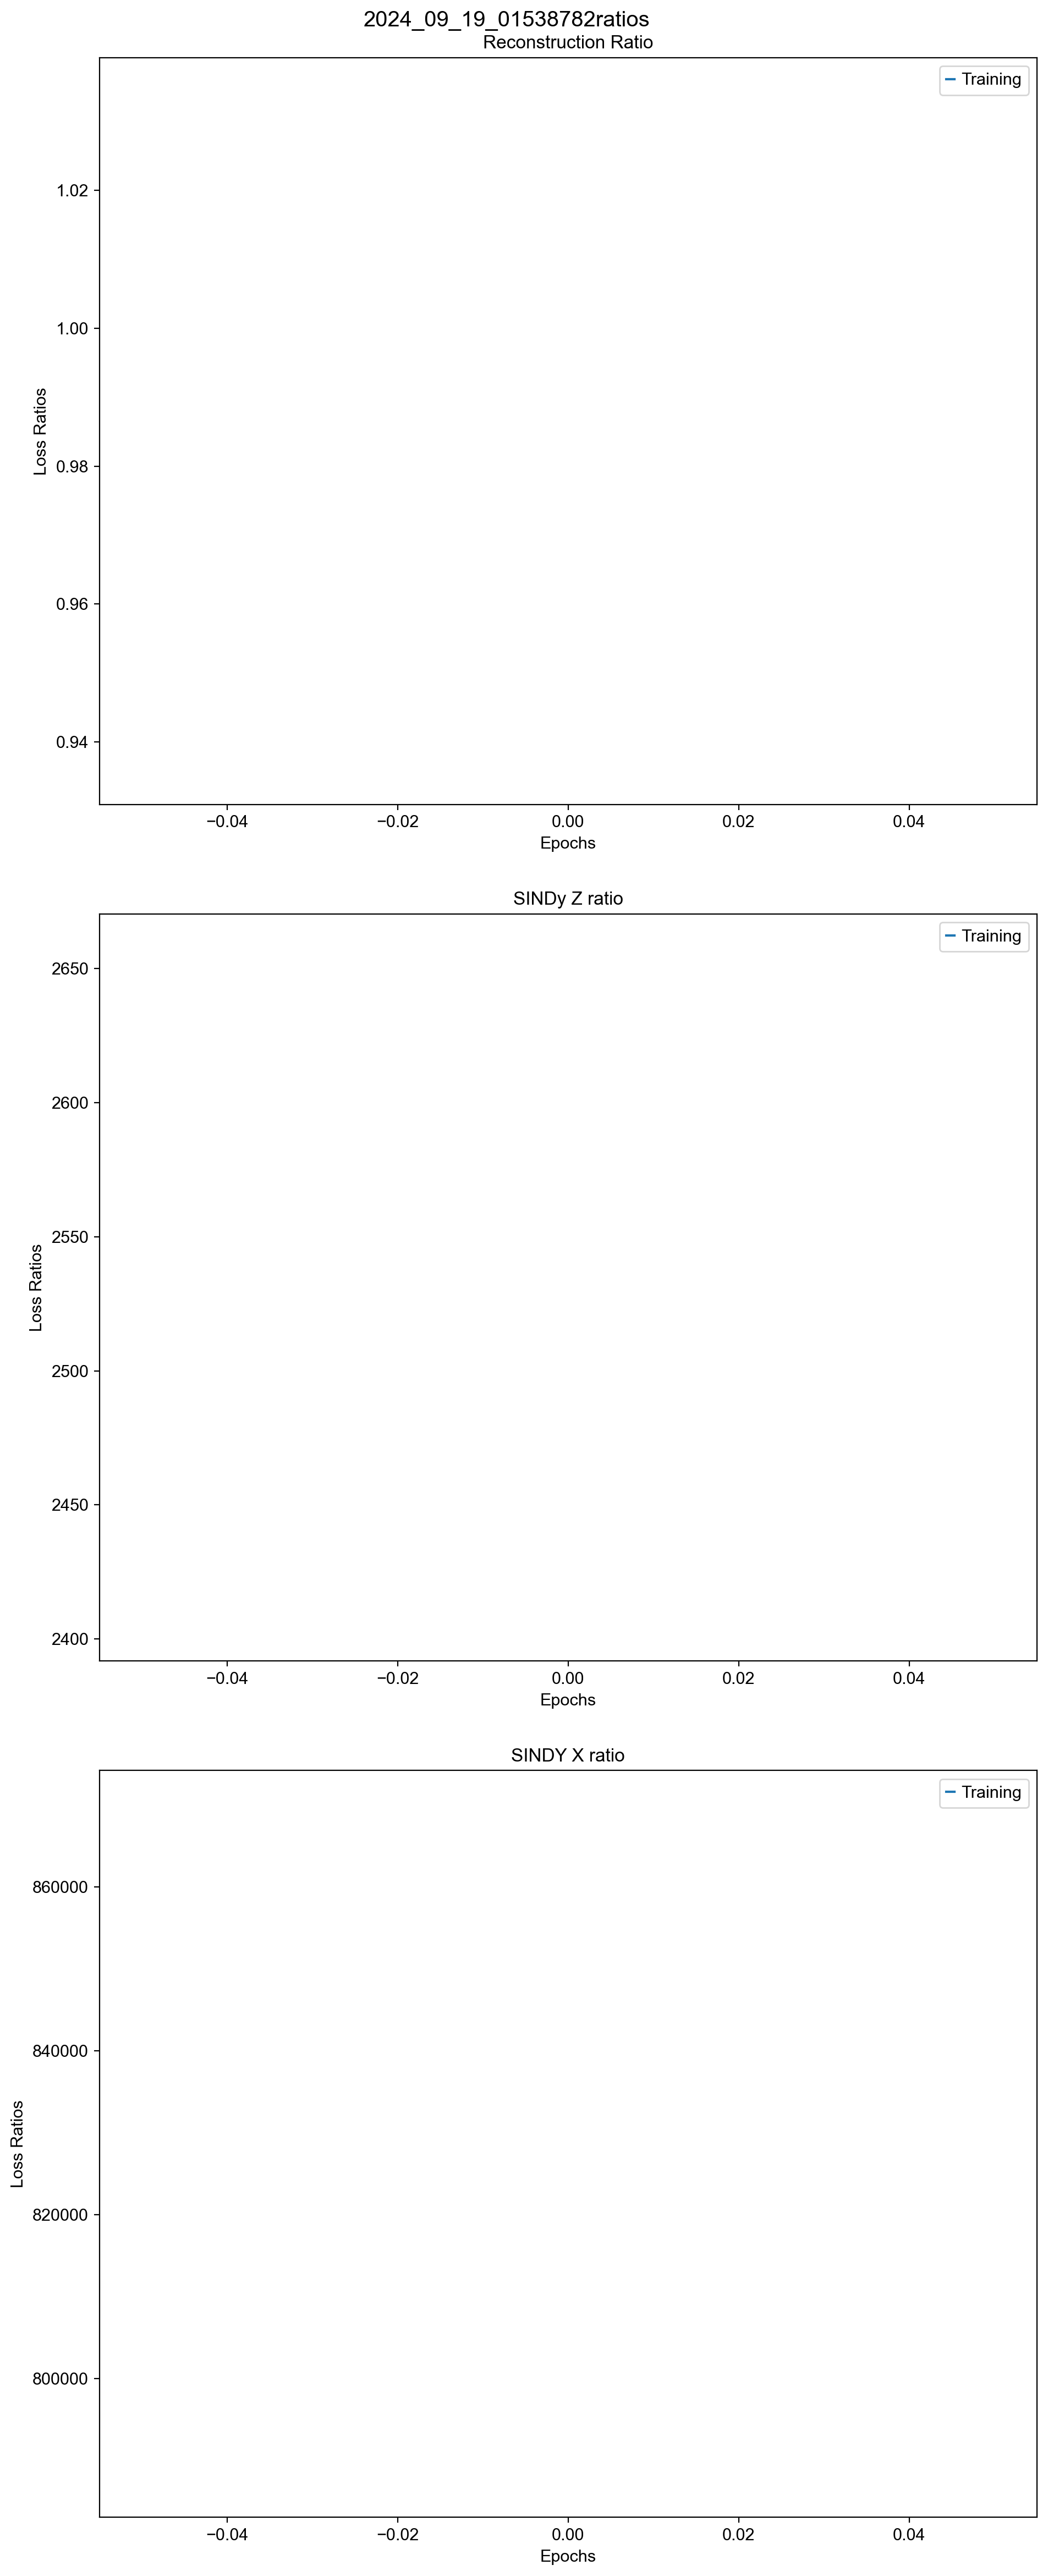

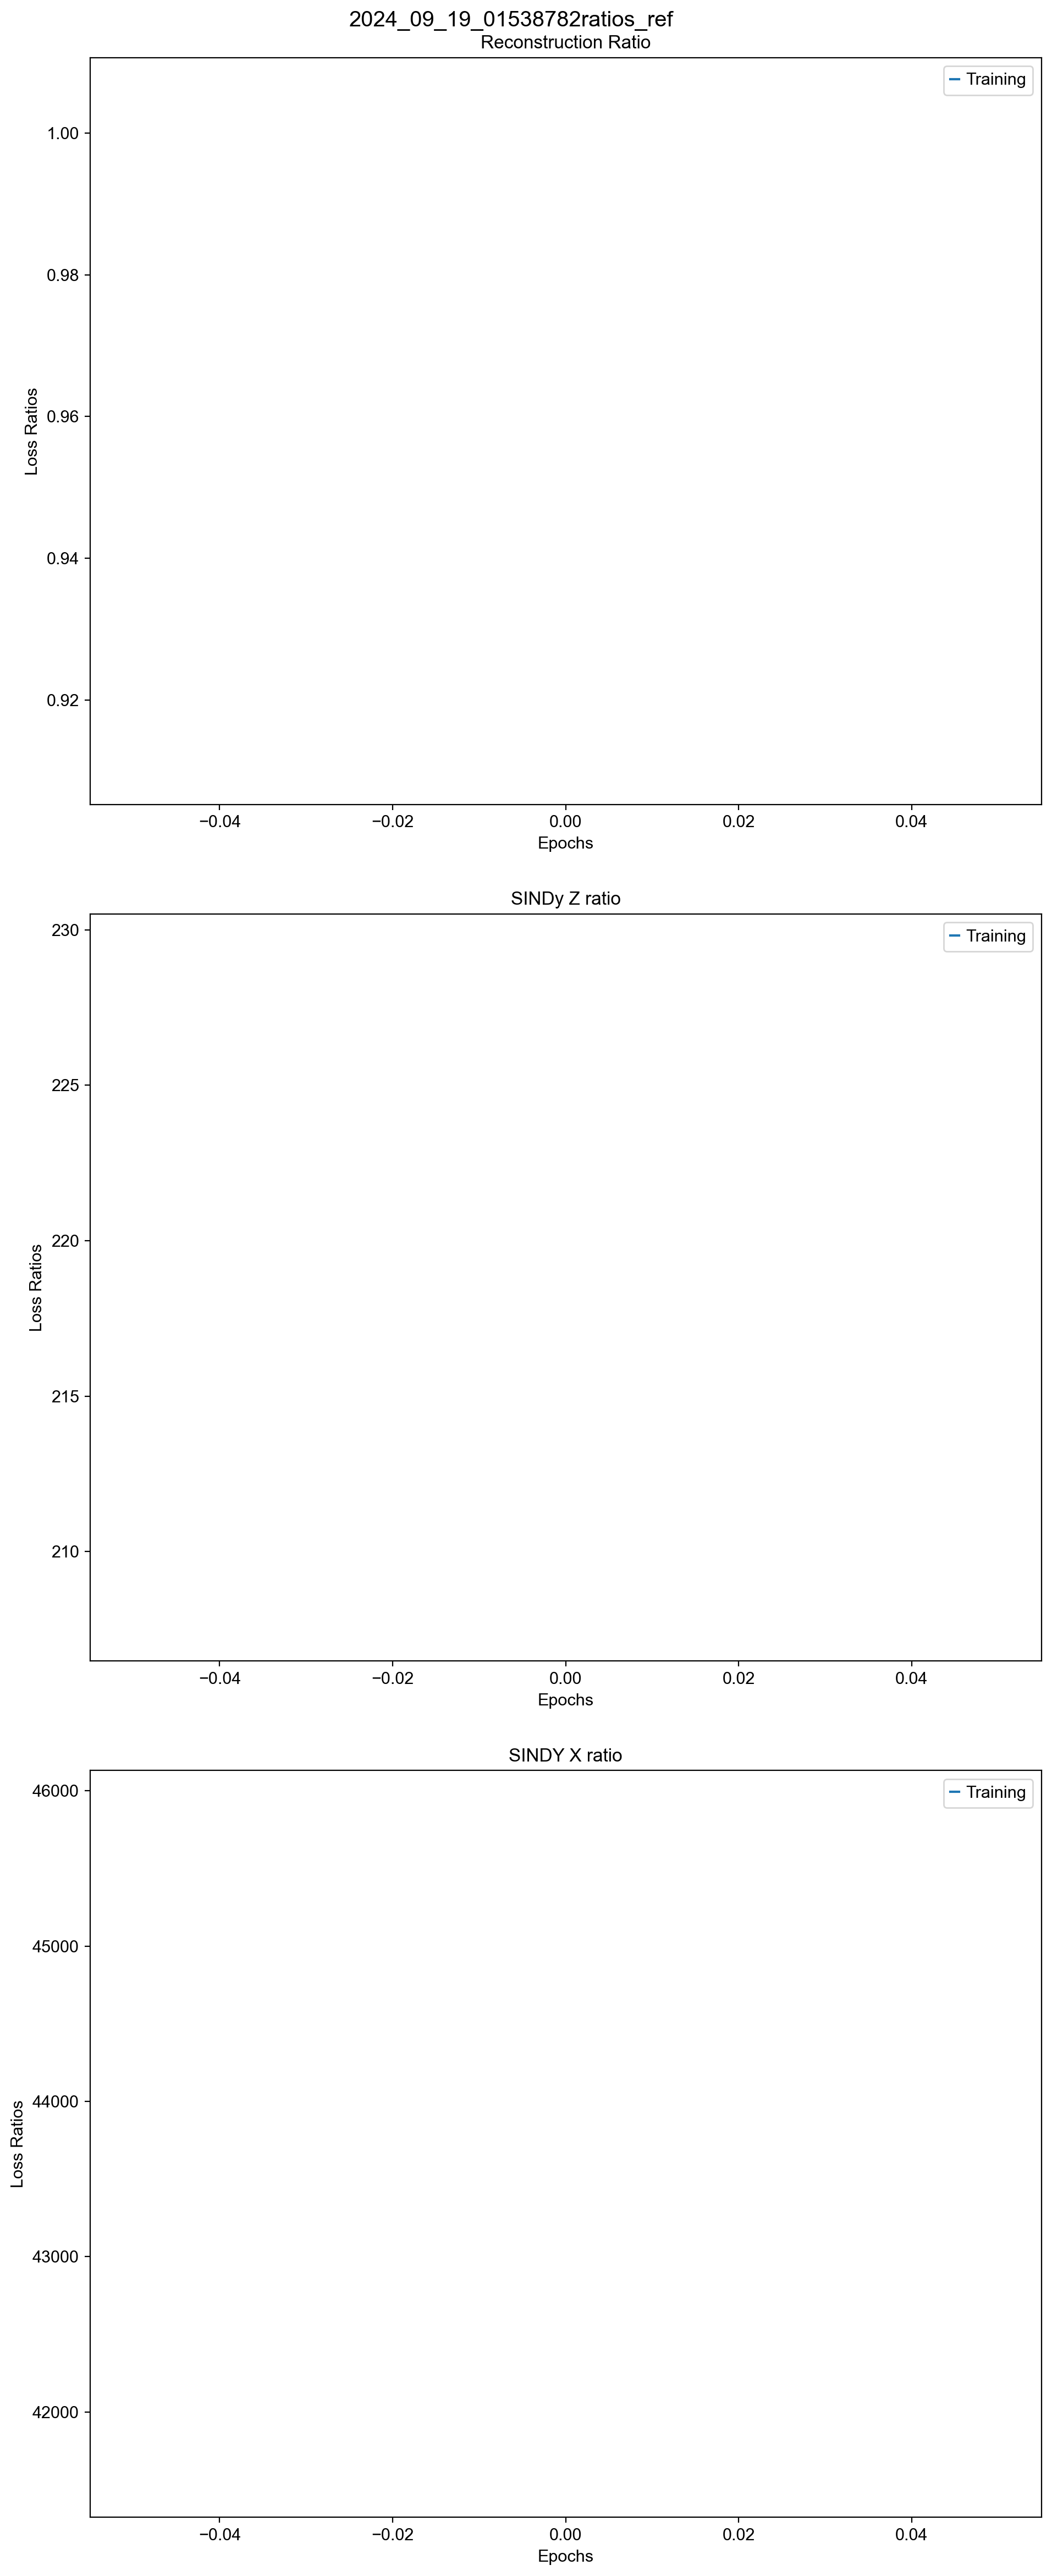

EXPERIMENT 3


c:\Users\Vasu\anaconda3\envs\sindy\lib\site-packages\tensorflow\python\framework\tensor_util.py:501: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_proto.tensor_content = nparray.tostring()
c:\Users\Vasu\anaconda3\envs\sindy\lib\site-packages\tensorflow\python\framework\tensor_util.py:119: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  tensor_proto.float_val.extend([np.asscalar(x) for x in proto_values])
c:\Users\Vasu\anaconda3\envs\sindy\lib\site-packages\tensorflow\python\framework\tensor_util.py:125: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  tensor_proto.int_val.extend([np.asscalar(x) for x in proto_values])


TRAINING
Legend
['Combined loss', 'Reconstruction loss', 'SINDy_z loss', 'SINDy_x loss', 'Sindy Regularisation- L1 Norm', 'Autoencoder weights- L1 Norm', 'Classification Loss']
Epoch 0
Training loss 34.746150970458984, (0.27989882, 582.8341, 2.1020415, 0.9998116, 47481.215, 0.6602433)
Validation loss 34.78340148925781, (0.28113034, 573.1999, 2.0693789, 0.9998116, 47481.215, 0.6739454)
decoder loss ratio: 0.967636, decoder SINDy loss  ratio: 2538.017846, SINDy z loss ratio: 821074.625000
REFINEMENT
Epoch 0
Training loss 28.149747848510742, (0.2721127, 25.54764, 0.05627511, 0.9998116, 47055.57, 0.63031924)
Validation loss 28.282480239868164, (0.2734059, 25.583422, 0.056479525, 0.9998116, 47055.57, 0.63335073)
decoder loss ratio: 0.941049, decoder SINDy loss  ratio: 69.270082, SINDy z loss ratio: 36646.722656


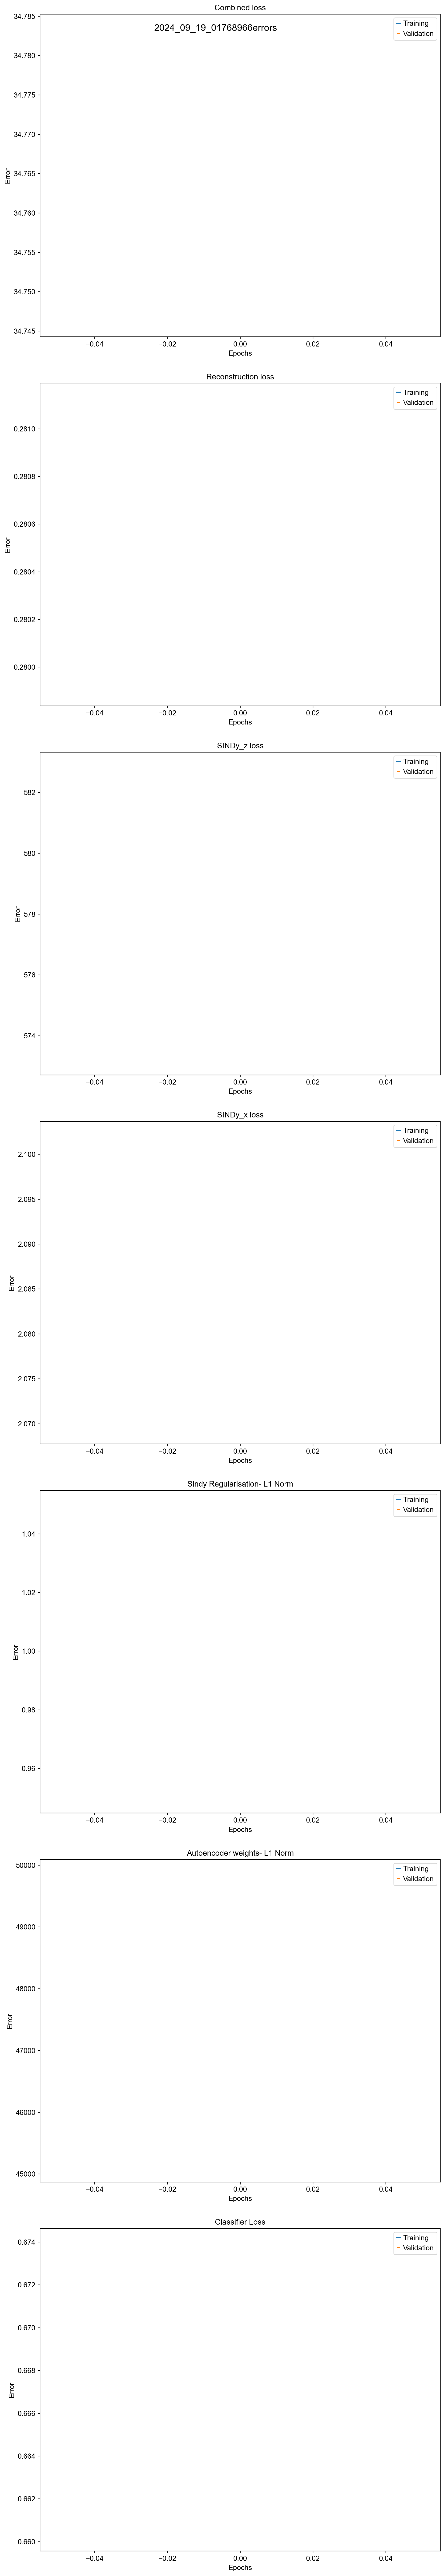

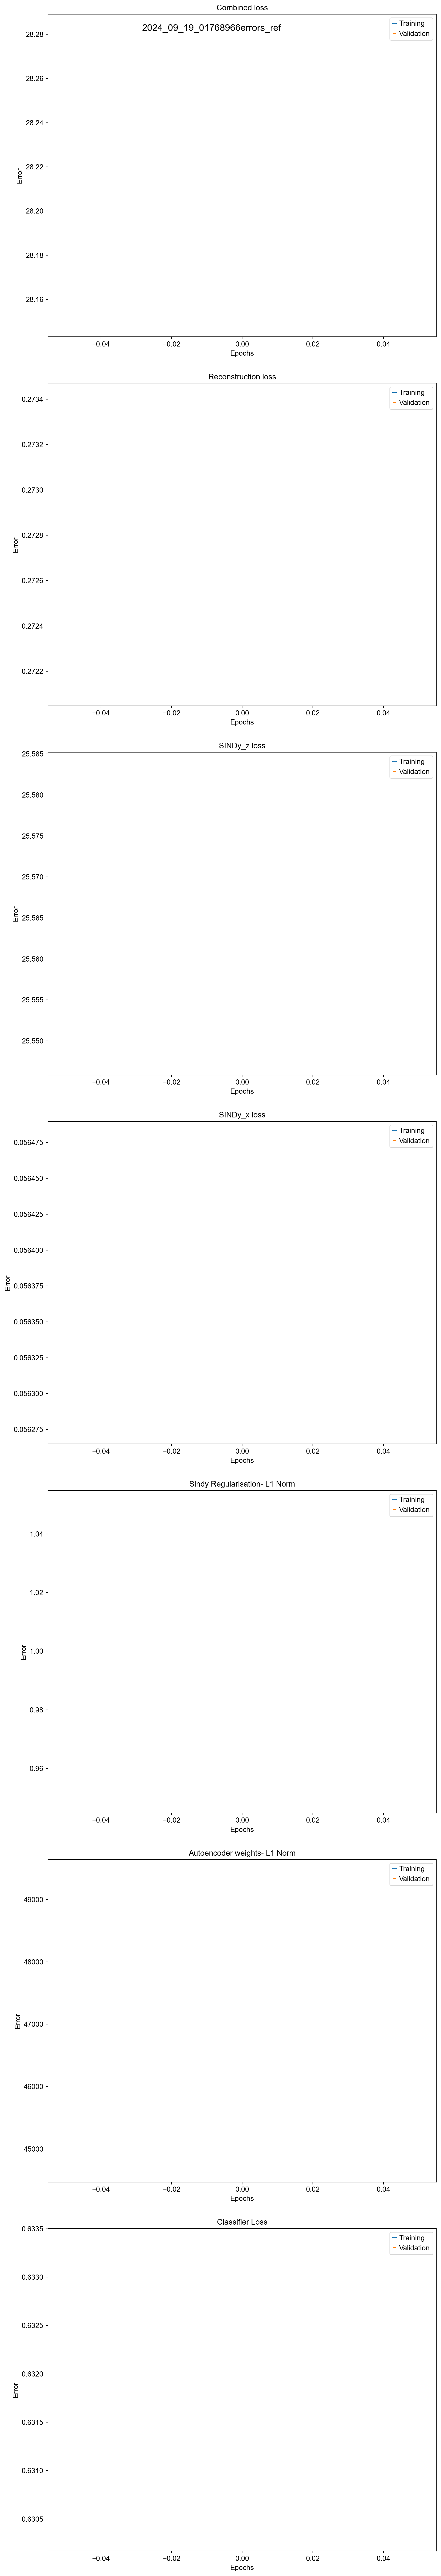

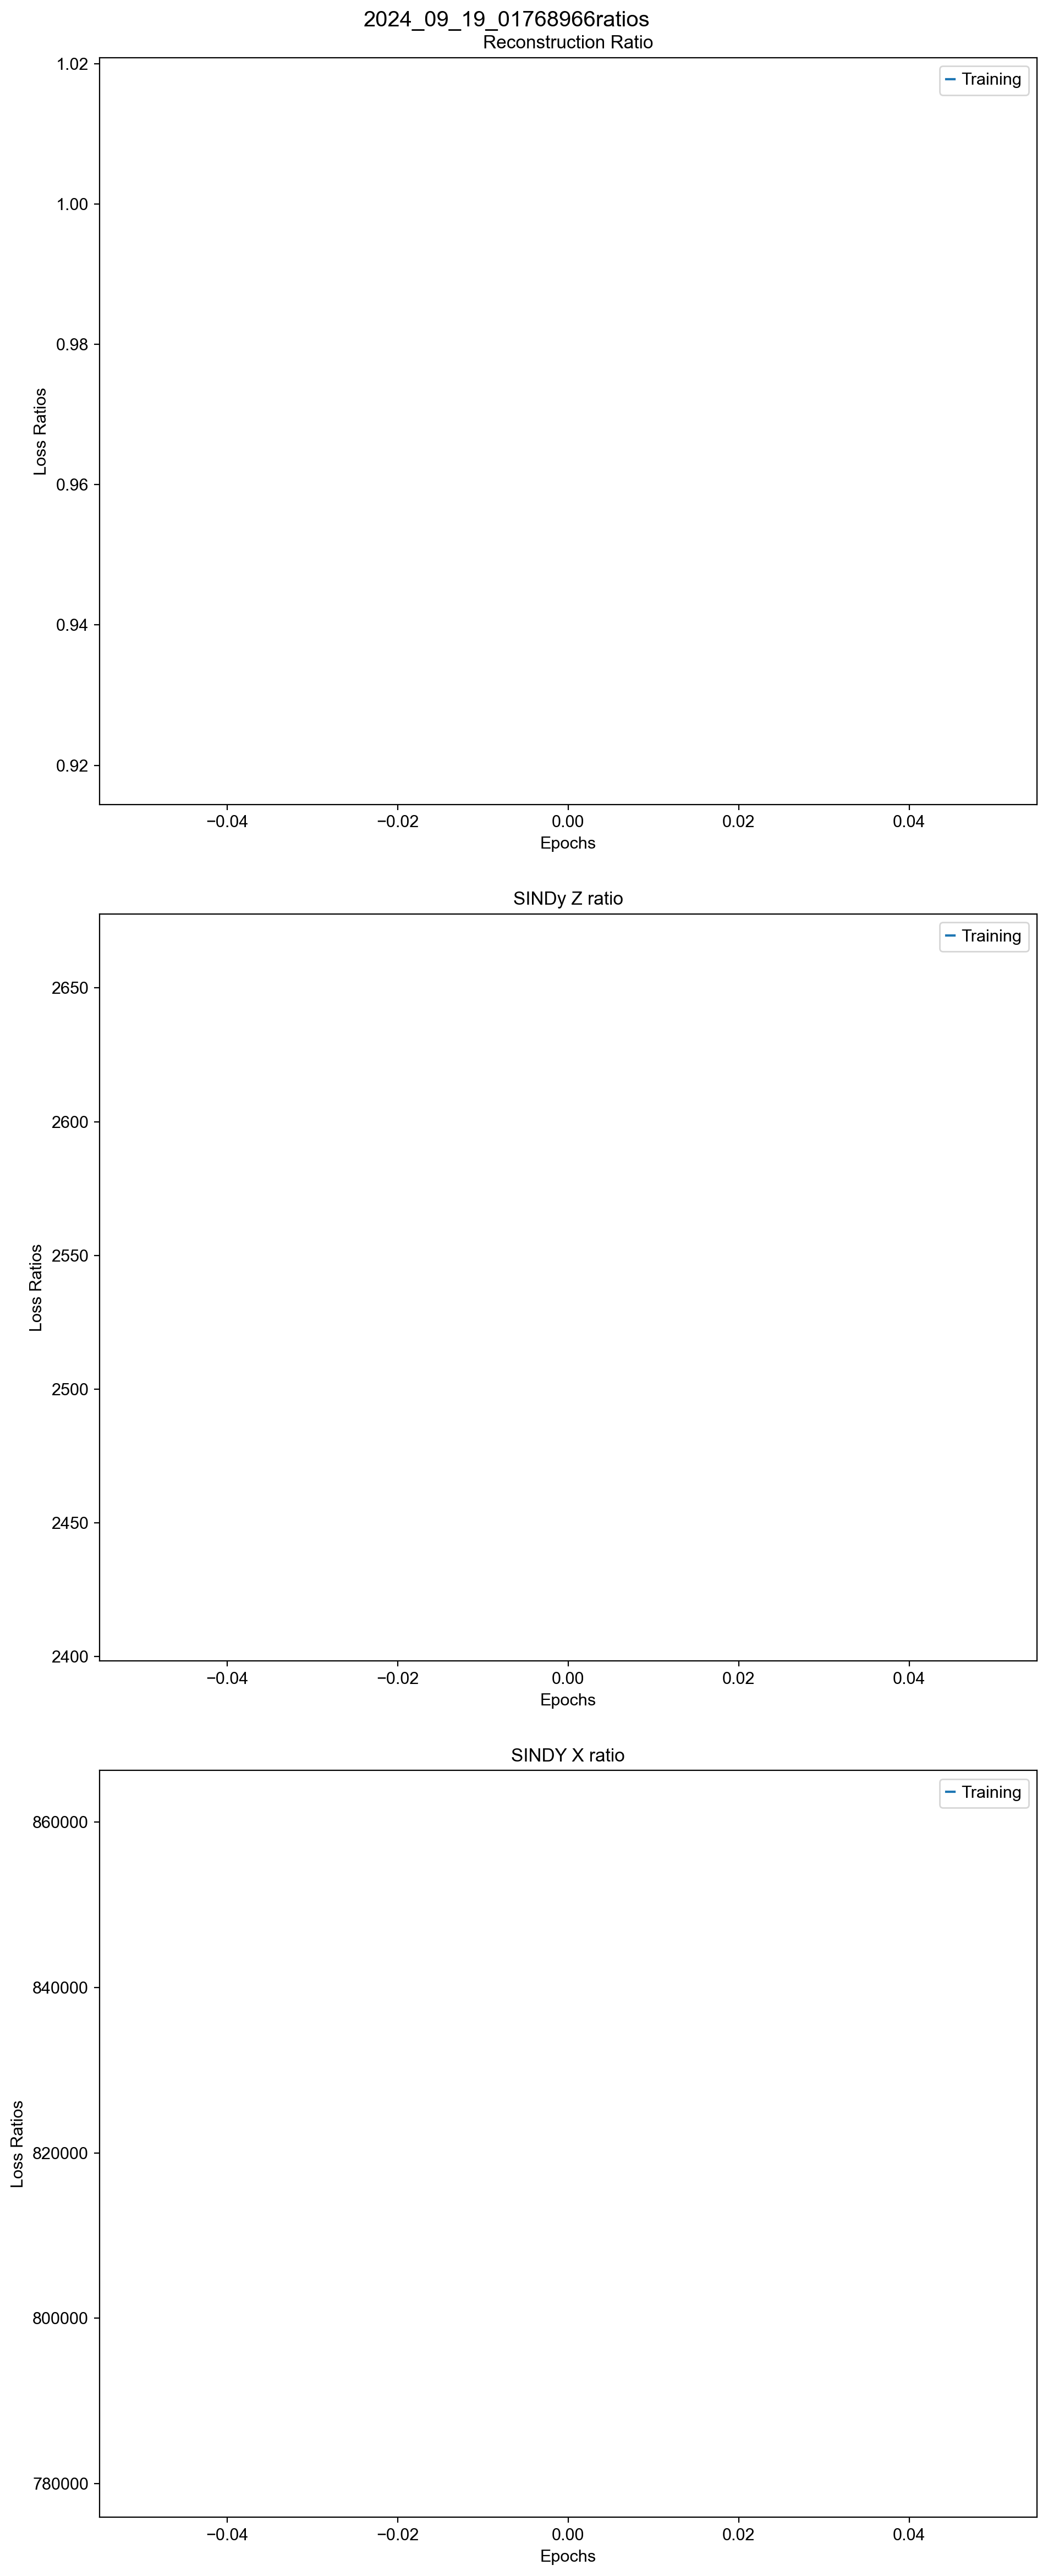

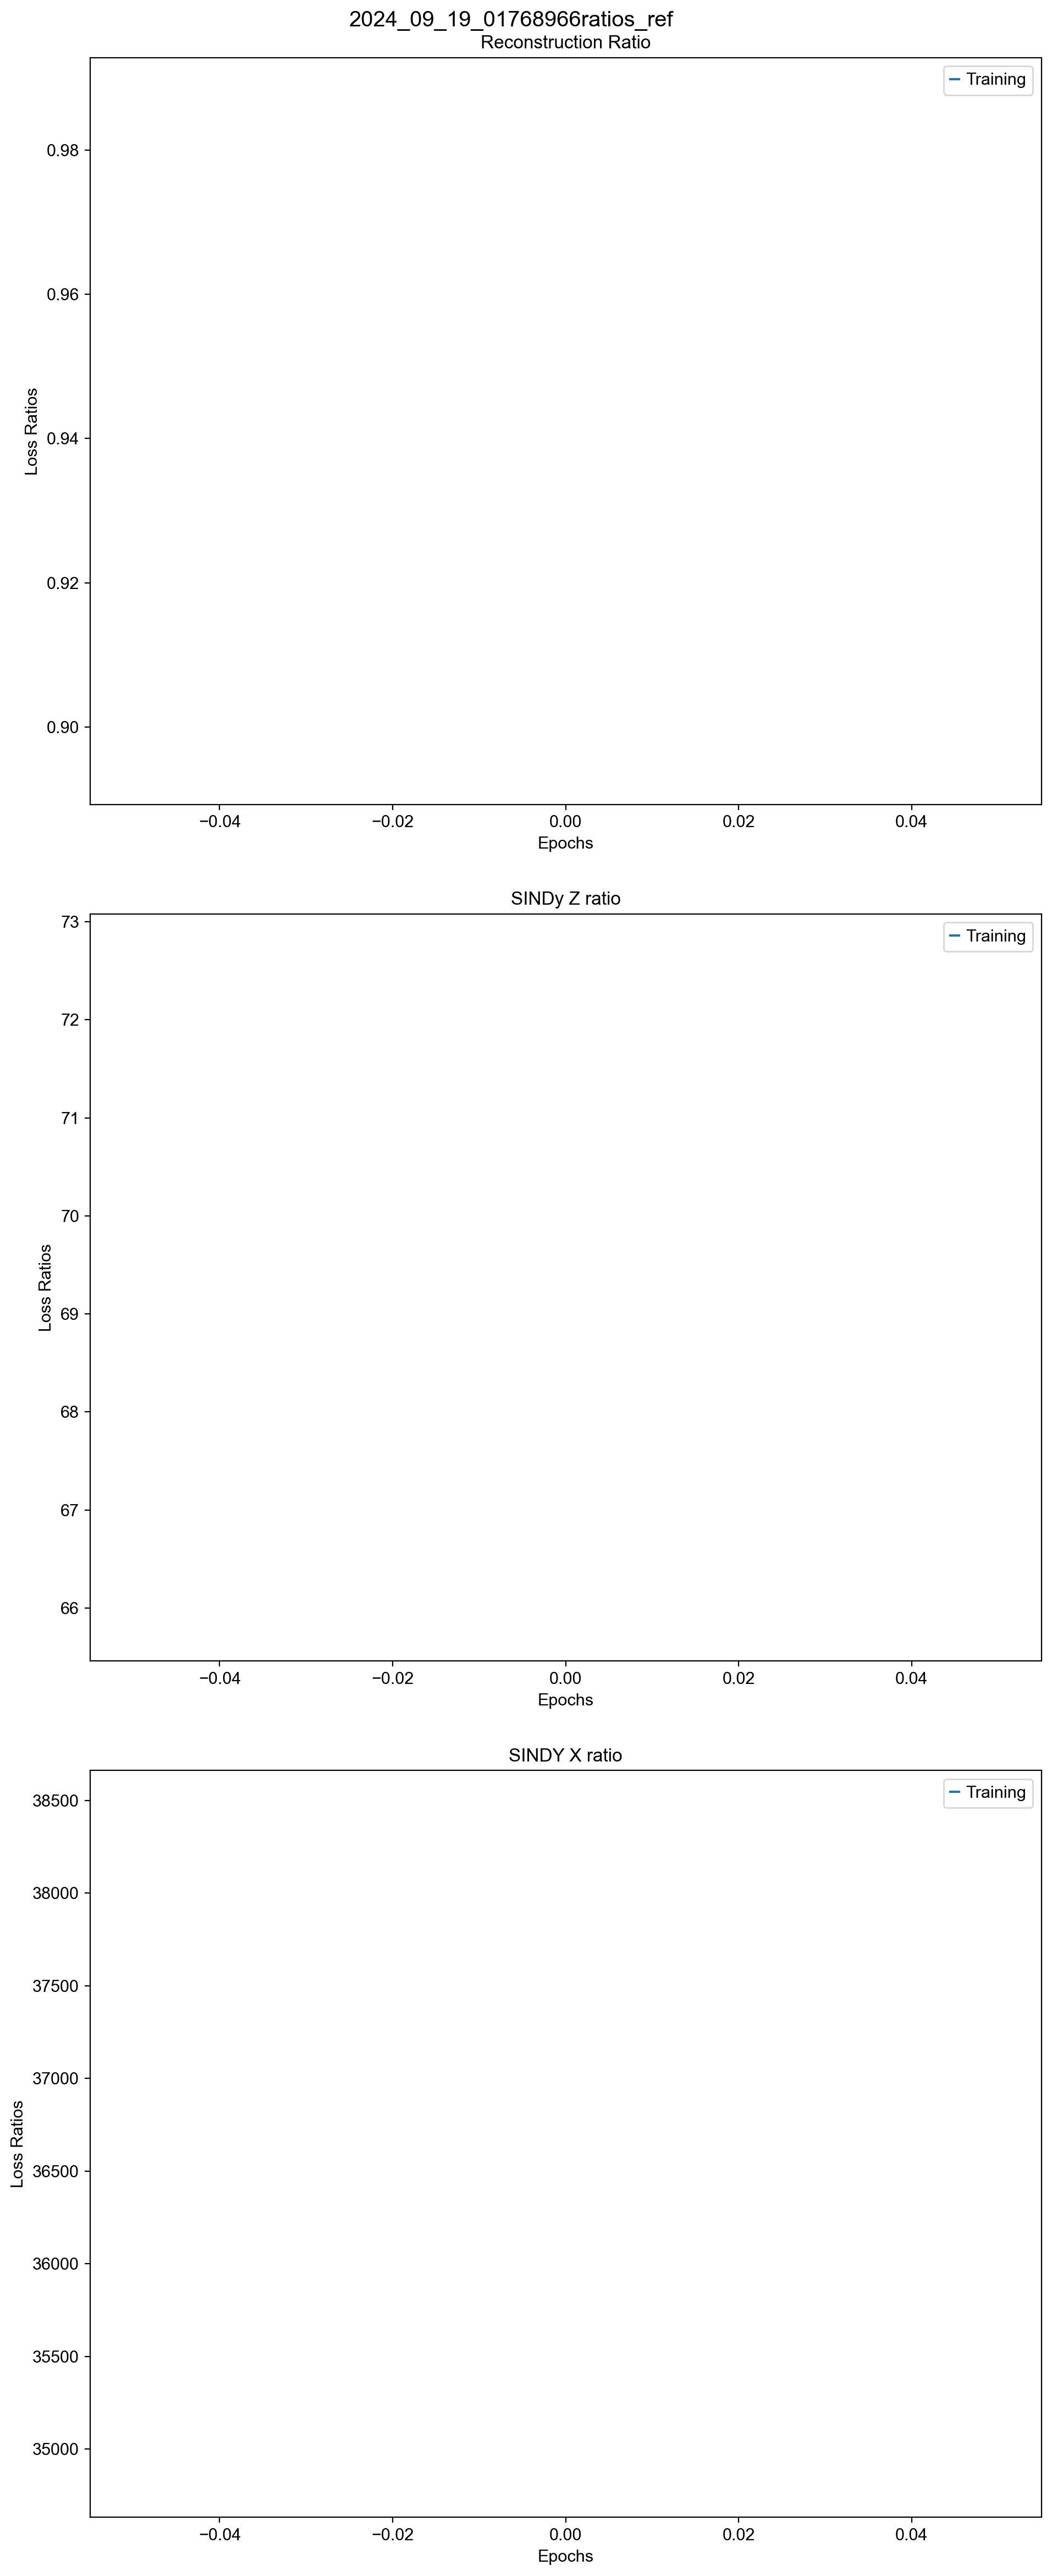

In [45]:
# Target folder name to track the experiments
params['folder']='test'

latent_dim=6
params['model']='Pancreas'
params['input_dim'] = 2000
params['latent_dim'] =6
params['model_order'] = 1
params['poly_order'] = 2
params['include_sine'] = True
params['include_constant']=True
#The below inclide parameters have only been simulated for model_order 1 for now
if params['model_order']==1:
    params['include_tan']=False
    params['include_log']=False #this can be modified later such that the domain restirctions of log doesnt become a problem. For now it is kept to false.
    params['include_exp']=True
    params['include_reciprocal_func']=True
else:
    params['include_tan']=False
    params['include_log']=False
    params['include_exp']=True
    params['include_reciprocal_func']=False
params['library_dim'] = library_size(n=params['latent_dim'], poly_order=params['poly_order'], use_sine=params['include_sine'], include_constant=params['include_constant'],use_tan=params['include_tan'],use_log=params['include_log'],use_exp=params['include_exp'],use_reciprocal=params['include_reciprocal_func'])

# sequential thresholding parameters
params['sequential_thresholding'] = True
params['coefficient_threshold'] = 0.1
params['threshold_frequency'] = 200
params['coefficient_mask'] = np.ones((params['library_dim'], params['latent_dim']))

# loss function weighting
params['loss_weight_decoder'] = 100
params['loss_weight_sindy_z'] = 1e-2
params['loss_weight_sindy_x'] = 1e-1
params['loss_weight_sindy_regularization'] =1e-2
params['autoencoder_regularization']=1e-6

params['weights']=[params['loss_weight_decoder'],params['loss_weight_sindy_z'],params['loss_weight_sindy_x'],params['loss_weight_sindy_regularization'],params['autoencoder_regularization'], params['latent_dim'],params['coefficient_threshold'],params['shap_weight']]

params['activation'] = 'relu'
params['widths'] = [512,32]
# training parameters
params['epoch_size'] = training_data['x'].shape[0]
params['batch_size'] = training_data['x'].shape[0]
params['learning_rate'] =1e-3
params['print_progress'] = True
params['print_frequency'] = 50

params['num_classes']=7
# training time cutoffs
params['max_epochs'] = 1
params['refinement_epochs'] =1
params['terms']=4*latent_dim+6 # put as None if the training should go for entire epoch defined. If the number of active terms go below this, the training stops


#classifier parameters
params['classify']=True
params['classifier_widths']=[8]
params['weights']=params['weights']+[params['classifier_widths']]
params['loss_class']=1
num_instance = 4

df = pd.DataFrame()
for i in range(num_instance):
    print('EXPERIMENT %d' % i)
    params['encoder_weights']=build_network_layers(params['input_dim'], params['latent_dim'], params['widths'], 'encoder')
    params['decoder_weights']=build_network_layers(params['latent_dim'], params['input_dim'], params['widths'][::-1], 'decoder')
    params['classifier_weights']=build_network_layers( params['latent_dim'], params['num_classes'], params['classifier_widths'], 'encoder')
    params['coefficient_mask'] = np.ones((params['library_dim'], params['latent_dim']))
    
    # This can be any relevant format
    # params['folder'] = params['model']+str(params['widths'])+str(params['weights'])+str(params['learning_rate'])
    params['save_name']=datetime.datetime.now().strftime("%Y_%m_%d_%H%f")
    params['coefficient_initialization'] = 'specified'

    params['init_coefficients']=np.asarray(np.random.choice([-1, 1], size=(params['library_dim'], params['latent_dim'])), dtype=np.float32)

    # Create a save folder if it doesn't exist
    save_folder = os.path.join(params['data_path'], params['folder'])
    params['save_folder']=save_folder+"\\"
    os.makedirs(save_folder, exist_ok=True)
    os.chdir(save_folder)
    tf.reset_default_graph()

    # Train the network and obtain results
    results_dict = train_network(training_data, validation_data, params)
    df = df.append({**results_dict, **params}, ignore_index=True)

# Change back to the original data path
os.chdir(params['data_path'])    
# Save the DataFrame to a pickle file with a timestamped filename
df.to_pickle(f'experiment_results_{params["folder"]}.pkl')